In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import enchant
d = enchant.Dict("en_US")
data=pd.read_csv("YInt.csv")
data=data[data.message.notna()]

In [2]:
data["new_time"]=pd.to_datetime(data["time"]).dt.strftime('%Y-%m-%d %H')
data["new_time"]

0        2020-04-06 00
1        2020-04-06 00
2        2020-04-06 00
3        2020-04-06 00
4        2020-04-06 00
             ...      
41936    2020-04-10 11
41937    2020-04-10 11
41938    2020-04-10 11
41939    2020-04-10 11
41940    2020-04-10 11
Name: new_time, Length: 41930, dtype: object

In [52]:
word_count=data[data["new_time"].str.contains("2020-04-08")].message.str.split(expand=True).stack().value_counts().reset_index()
word_count[(~word_count["index"].str.lower().isin(stopwords.words('english'))) & (d.check(word_count["index"]))]

AttributeError: 'Series' object has no attribute 'encode'

In [60]:
d.suggest("relitavelyelatively")

['alliteratively', 'correlatively', 'relatively']

In [19]:
from nltk.stem.snowball import SnowballStemmer
import re
englishStemmer=SnowballStemmer("english")
old1 = pd.read_csv("new_YInt_deleted_adv_accounts.csv")

	
#print(new.columns)
#print(old.columns)
sum_w = 0
earthquakeList = ['temblor', 'wobbl', 'quiver', 'trumbl', 'tremor', 'quak', 'seismic', 'shake', 'epicent', 'earthquak', 'shook']
old1['Earthquake'] = ""
for i,row in old1.iterrows():
    old1.loc[i,'Earthquake'] = 0
    if not pd.isnull(old1.loc[i,'message']):# and old1.loc[i,'message'][:3] != "re:":
        
        for string in re.split(' |;|,|!|#',old1.loc[i,'message']):
            if englishStemmer.stem(string) in earthquakeList:
                sum_w += 1
                old1.loc[i,'Earthquake'] = 1
                break


print(sum_w)

844


In [20]:
old1["new_time"]=pd.to_datetime(old1["time"]).dt.strftime('%Y-%m-%d %H')

In [24]:
old1.groupby("new_time").apply(lambda x:x["Earthquake"].sum()).to_csv("area_earthquake.csv")

C:\Users\tallu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


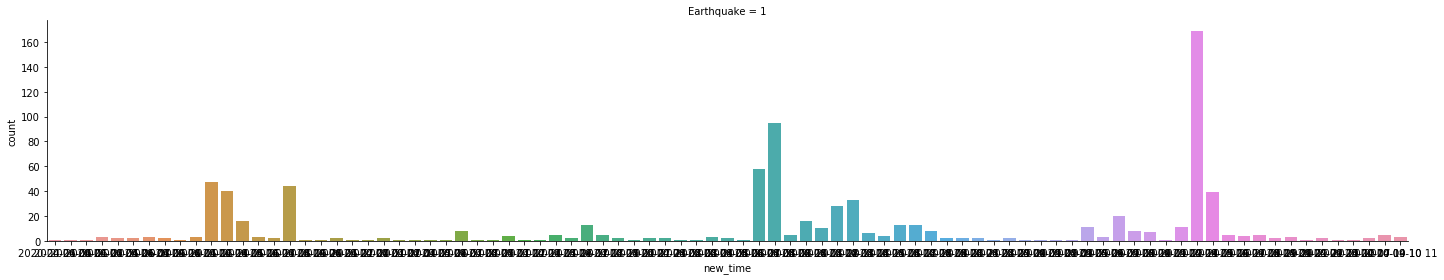

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="new_time", col="Earthquake",
                data=old1[old1.Earthquake==1], kind="count",
                height=4, aspect=5);

In [10]:
plt.show()

In [23]:
old1.to_csv("new_YInt_deleted_adv_accounts_earthquake.csv")